# Matrices Jacobiano y Hessiana de funciones multidimensionales

Se debe instalar y luego cargar la librería "numDeriv":

```R
install.packages("numDeriv")
library("numDeriv")
```

El gradiente, Jacobiano y Hessiano corresponden a la generalización de la primera y segunda derivada de funciones $f:\mathbb{R}^m\rightarrow\mathbb{R}$ y $f:\mathbb{R}^m\rightarrow\mathbb{R}^n$.

Para una función escalar $f:\mathbb{R}^m\rightarrow\mathbb{R}$ el _gradiente_ $\nabla f$ será un vector con $m$ componentes y su Hessiano $\mathbf{H}_f$ corresponderá una matrix en $\mathbb{R}^{m\times m}$.

Por otra parte, para una función $f:\mathbb{R}^m\rightarrow\mathbb{R}^n$ su jacobiano $\mathbf{J}_f$ será una matriz en $\mathbb{R}^{n\times m}$ y su Hessiano será un tensor (un arreglo de $m$ matrices Hessianas como las del caso anterior). Este último caso queda fuera de lo que veremos en el curso.

## Ejemplo - Gradiente y Hessiano de una función $f:\mathbb{R}^2\rightarrow\mathbb{R}$:

$$f(\mathbf{x})=x_1^3 - 2x_1\cdot x_2 - x_2^6$$

Por lo tanto $\nabla f\in\mathbb{R}^{2}$, es decir:

$$
\begin{bmatrix}
    \dfrac{\partial f}{\partial x_1} & \dfrac{\partial f}{\partial x_2} 
\end{bmatrix}
=
\begin{bmatrix}
    3x_1^2-2x_2 & -2x_1-6x_2^5
\end{bmatrix}
$$

Si se evalua $\nabla f$ en el vector $\mathbf{x}=(1,2)$ se obtiene:

$$
\nabla f(1,2)
=
\begin{bmatrix}
    -1 & -194
\end{bmatrix}
$$

El código en R para realizar este cálculo es:
```R
func <- function(x){
    x[1]^3 - 2*x[1]*x[2] - x[2]^6
}

z <- genD(func, c(1,2))$D[,1:2]
z
```

La matriz Hessiana contiene las derivadas parciales de segundo orden. Para una función $f:\mathbb{R}^2\rightarrow\mathbb{R}$ la matriz $\mathbf{H}_f\in\mathbb{R}^{2\times 2}$ y se conforma de la siguiente manera:

$$
H_f(\mathbf{x})
=
\begin{bmatrix}
    \dfrac{\partial^2}{\partial x_1^2}           & \dfrac{\partial^2}{\partial x_1\partial x_2}\\
    \dfrac{\partial^2}{\partial x_2\partial x_1} & \dfrac{\partial^2}{\partial x_2^2}
\end{bmatrix}
=
\begin{bmatrix}
    6x_1 & -2\\
    -2   & -30x_2^4
\end{bmatrix}
$$

Entonces finalmente $H_f(1,2)$ es:

$$
H_f(1,2)
=
\begin{bmatrix}
    6 & -2\\
    -2   & -480
\end{bmatrix}
$$

El código para obtener esta matriz es el siguiente:
```R
func <- function(x){
    x[1]^3 - 2*x[1]*x[2] - x[2]^6
}

# Extrae triangular inferior de Hessiano
z <- genD(func, c(1,2))$D[,3:5]
z
```

## Ejemplo - Jacobiano de una función $f:\mathbb{R}^2\rightarrow\mathbb{R}^3$:

Se tiene la siguiente función $f:\mathbb{R}^2\rightarrow\mathbb{R}^3$:
$$f(\mathbf{x})=(x_1,2x_1,x_2^2)$$

La que puede descomponerse en las siguientes 3 partes:

$$f_1(\mathbf{x})=x_1 $$

$$f_2(\mathbf{x})=2x_1 $$

$$f_3(\mathbf{x})=x_2^2 $$

Por lo tanto $\mathbf{J}_f\in\mathbb{R}^{3\times 2}$, es decir:
$$
\left[\dfrac{\partial \mathbf{f}}{\partial x_1}, \dfrac{\partial \mathbf{f}}{\partial x_2}\right]
=
\begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} \\
    \dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2} \\
    \dfrac{\partial f_3}{\partial x_1} & \dfrac{\partial f_3}{\partial x_2} 
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 \\
    2 & 0 \\
    0 & 2x_2
\end{bmatrix}
$$
Si se evalua $\mathbf{J}_f$ en el vector $\mathbf{x}=(2,5)$ se obtiene:
$$
\mathbf{J}_f(2,5)
=
\begin{bmatrix}
    1 & 0 \\
    2 & 0 \\
    0 & 10
\end{bmatrix}
$$

La librería ```numDeriv``` permite obtener el valor del Jacobiano de una función en un punto determinado. Observe el siguiente fragmento de código:
```R
library("numDeriv")

func <- function(x){
    c(x[1], 2*x[1], x[2]^2)
}
# Se extraen las primeras 2 columnas de la matriz D
z <- genD(func, c(2,5))$D[,1:2] 
z
```

## Actividades

Calcule analiticamente y verifique e R la matriz Jacobiana para la siguiente función:

* $f(\mathbf{x})=(x_1^2x_2 \ , \ 5x_1+\sin x_2)$
* $f(\mathbf{x})=(2x_1^2-3x_2 \ , \ x_1+x_2)$

Calcule el Gradiente y Hessiano de la función $f(\mathbf{x})=x_1^4-32x_1^2+x_2^4-18x_2^2$

---

# Aproximación de funciones escalares mediante series de Taylor

Primero se debe instalar y luego cargar la librería "ggplot2":

```R
install.packages("ggplot2")
library("ggplot2")
```


## Caso Univariado

Una serie de Taylor es una representación de una función (infinitamente diferenciable) en el _entorno de un punto_ mediante una serie de potencias.
Consideremos inicialmente una función $f:\mathbb{R}\rightarrow\mathbb{R}$, sus derivadas y un punto $x=a\in\mathbb{R}$ entorno al cual analizaremos la función. Entonces la serie de Taylor que representa a esta función es:

$$
T(x) = \sum_{n=0}^{\infty} \dfrac{f^{(n)}(a)}{n!}(x-a)^n, \qquad f^{(n)}(a)\sim\mbox{n-ésima derivada de $f$ evaluada en $a$}
$$

Desagreguemos esta expresión considerando únicamente los primeros 3 términos de la sucesión, es decir $n=[0,1,2]$:

$$
T(x) = f(a)+f^{(1)}(a)*(x-a)+\frac{1}{2}f^{(2)}(a)*(x-a)^2
$$

#### Ejemplo
Ahora veremos un ejemplo en el que representaremos la función $f(x)=x^3-2x-20$ con 2 y luego con 3 términos de la sucesión. Para esto primero obtengamos la primera y segunda derivada, es decir:

$$f^{(1)}(x)= 3x^2-2$$

$$f^{(2)}(x)= 6x$$

En lugar de expresar análiticamente la sucesión de sumas podemos entregarle a R esta tarea. Para esot crearemos una función algo _esotérica_ que en lugar de devolver un valor escalar, devuelve otra función correspondiente a la sucesión de Taylor hasta el segundo término:

```R
T <- function(a, f, fp){ # recibe el punto 'a', la función y su primera derivada
    c <- a
    function(x){ # entrega como resultado la función que representa a la representación de Taylor alrededor de 'a'
        f(c)+fp(c)*(x-c)
    }
}
```

Grafiquemos la función $f$ y encontremos un punto alrededor del cual centraremos nuestro trabajo:

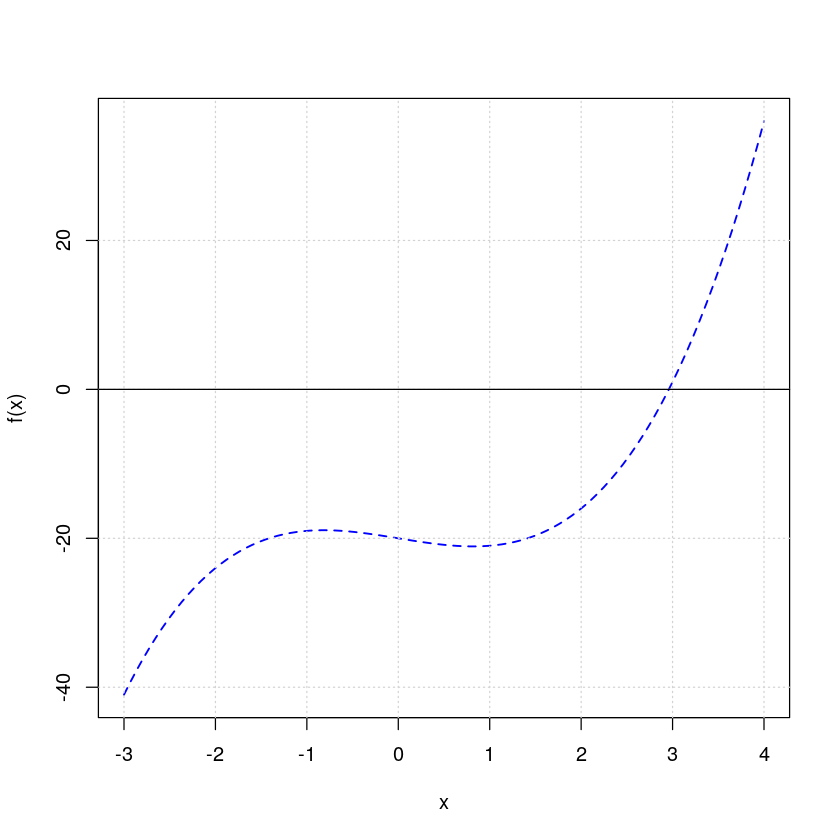

In [1]:
f <- function(x) x^3-2*x-20
fp <- function(x) 3*x^2-2
fpp <- function(x) 6*x

curve(f, xlim=c(-3,4), col='blue', lwd=1.5, lty=2)
grid()
abline(h=0)

El punto escogido es $x=3$ (puedes escoger cualquier otro, pero __OJO__ deberás modificar el código a continuación). Por lo tanto, la sucesión de Taylor hasta el segundo término y alrededor del punto seleccionado estará dada por la expresión ```T_en_a <- T(3,f,fp)```.

In [55]:
T <- function(a, f, fp){
    c <- a
    function(x){
        f(c)+fp(c)*(x-c)
    }
}

T_en_a <- T(3,f,fp)

Grafiquemos nuevamente la función, pero esta vez agreguemos la gráfica de la función de aproximación:

Warning message:
“Removed 57 rows containing missing values (geom_path).”

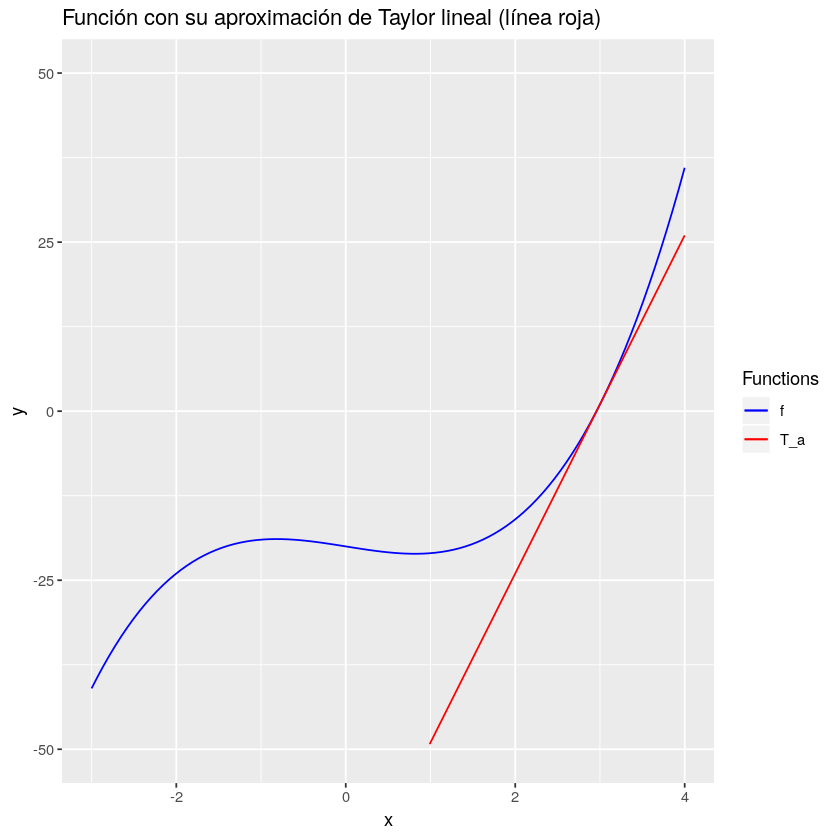

In [56]:
library(ggplot2)

p <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
p + stat_function(fun=f, geom="line", aes(colour="f")) +
    stat_function(fun=T_en_a, geom="line", aes(colour="T_a")) +
    scale_x_continuous(limits = c(-3, 4)) + ylim(-50, 50) +
    scale_color_manual(name = "Functions", values = c("blue", "red"))+
        ggtitle("Función con su aproximación de Taylor lineal (línea roja)")

Hagamos un _zoom_ alrededor del punto $x=3$ para tener un poco más de detalle respecto de la aproximación alcanzada:

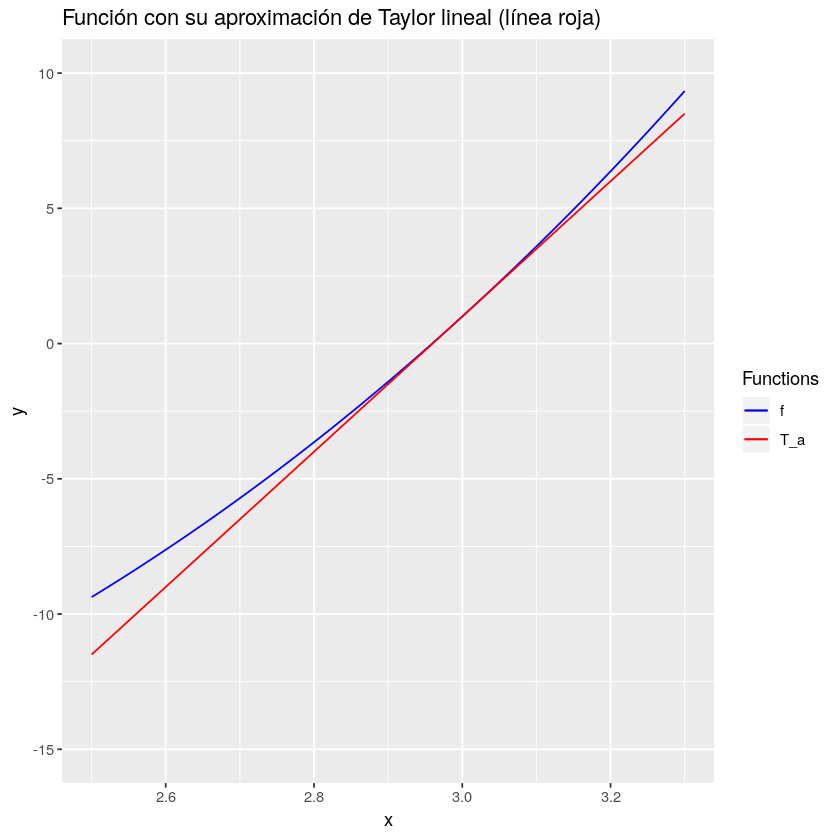

In [57]:
p <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
p + stat_function(fun=f, geom="line", aes(colour="f")) +
    stat_function(fun=T_en_a, geom="line", aes(colour="T_a")) +
    scale_x_continuous(limits = c(2.5, 3.3)) + ylim(-15, 10) +
    scale_color_manual(name = "Functions", values = c("blue", "red"))+
        ggtitle("Función con su aproximación de Taylor lineal (línea roja)")

Consideremos ahora la aproximación hasta el __tercer término__ de la sucesión:

In [58]:
T <- function(a, f, fp, fpp){ 
    c <- a
    function(x){
        f(c)+fp(c)*(x-c)+0.5*fpp(c)*(x-c)^2
    }
}


T_en_a <- T(3,f,fp, fpp)

Grafiquemos nuevamente la función, pero esta vez agreguemos la gráfica de la función de aproximación:

Warning message:
“Removed 4 rows containing missing values (geom_path).”Warning message:
“Removed 40 rows containing missing values (geom_path).”

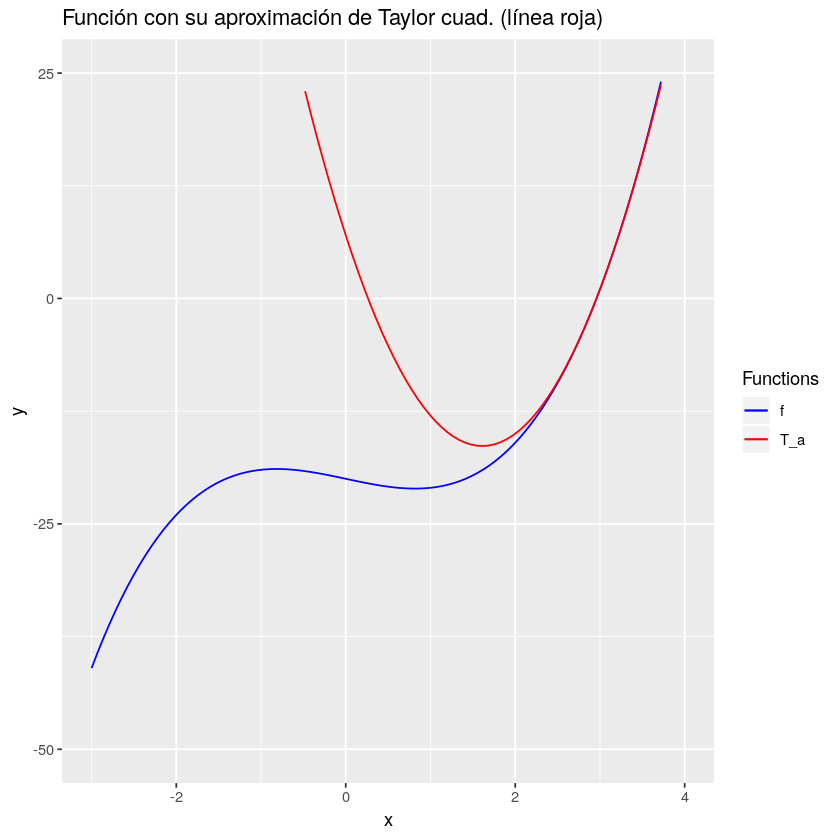

In [63]:
library(ggplot2)

p <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
p + stat_function(fun=f, geom="line", aes(colour="f")) +
    stat_function(fun=T_en_a, geom="line", aes(colour="T_a")) +
    scale_x_continuous(limits = c(-3, 4)) + ylim(-50, 25) +
    scale_color_manual(name = "Functions", values = c("blue", "red"))+
        ggtitle("Función con su aproximación de Taylor cuad. (línea roja)")

Hagamos (nuevamente) un zoom alrededor del punto x=3 para tener un poco más de detalle respecto de la aproximación alcanzada:

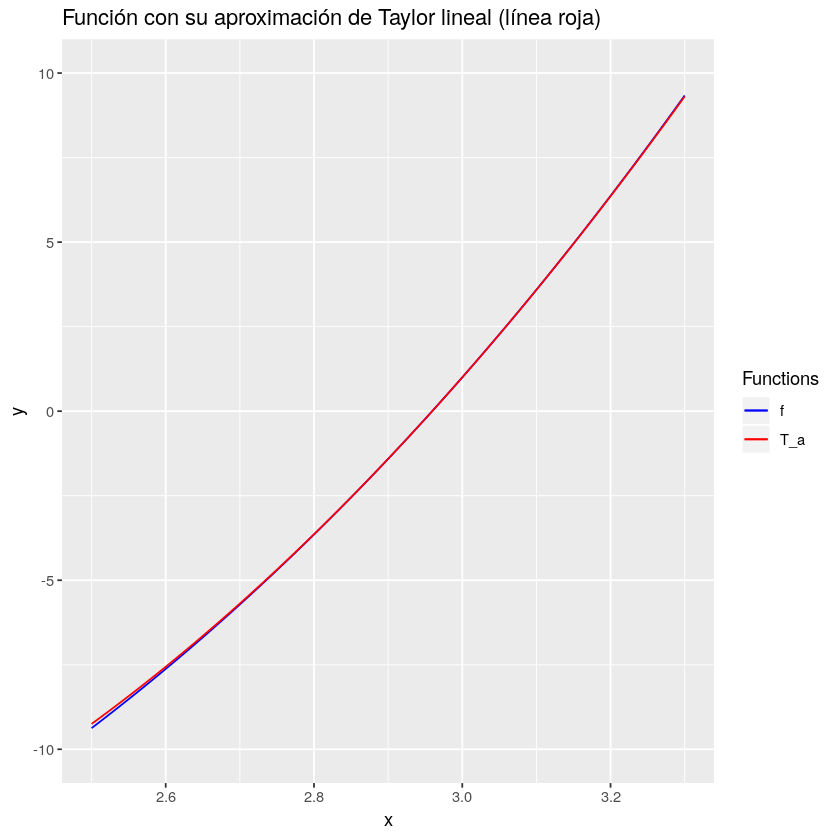

In [60]:
p <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
p + stat_function(fun=f, geom="line", aes(colour="f")) +
    stat_function(fun=T_en_a, geom="line", aes(colour="T_a")) +
    scale_x_continuous(limits = c(2.5, 3.3)) + ylim(-10, 10) +
    scale_color_manual(name = "Functions", values = c("blue", "red"))+
        ggtitle("Función con su aproximación de Taylor lineal (línea roja)")

__A partir__ de lo realizado al considerar 2 y 3 términos de la serie de Taylor, pudimos observar que en el primer caso ésta corresponde a una aproximación lineal y a una cuadrática en el segundo. Además se pudo observar la mejora en la calidad de la aproximación al aumentar en un término la sucesión.


## Caso Multivariado

La diferencia para el caso multivariado, es decir funciones escalares $f:\mathbb{R}^m\rightarrow\mathbb{R}$, radica en que en lugar de usar la primera y segunda derivada, se utilizan el vector gradiente y la matriz Hessiana respectivamente. 
Luego, la sucesión de Taylor hasta el tercer término (no nos interesa más que eso en el contexto del curso) es:

$$
T(\mathbf{x})=f(\mathbf{a})+(\mathbf{x}-\mathbf{a})^T\nabla f(\mathbf{a})+\frac{1}{2}(\mathbf{x}-\mathbf{a})^T\nabla^2 f(\mathbf{a})(\mathbf{x}-\mathbf{a})\ , \qquad \nabla^2 f(\mathbf{a})\sim H_f(\mathbf{a})
$$


----